### Importing required libraries

In [150]:
#Importing the required libraries
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

### Importing the dataset 

In [191]:
# Read & Display data
data1 = pd.read_csv("C:/Users/Aman.aggarwal/Documents/Exelon/Chem Sampling/wine.csv")
data = data1.copy()
data.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Initialising the class 

In [192]:
class Data:
    def __init__(self,df, pfeatures):
        '''
        function to intialise the class object 
        @params
        df = dataframe containing all the data with target variable 
        pfeatures=  list of columns other than target to do feature selection
        '''
        self.df = df
        self.pfeatures = pfeatures
        

#### Normalization 

In [193]:
class Normalization(Data):
    
    def __init__(self, Data):
        '''
        function to intialise the class object 
        '''
        self.data = Data.df
        self.pfeatures = Data.pfeatures
    
    def plot(self, x):
        '''
        function to plot:
        Distplot : It represents the univariate distribution of data 
        i.e. data distribution of a variable against the density distribution
        Probability Plot :The data are plotted against a theoretical distribution
        in such a way that the points should form approximately a straight line.
        Accepts data variable as argument
        '''
        sns.set(rc={'figure.figsize':(16,5)})
        sns.set_style("white")
        sns.distplot(x,fit=norm);
        fig = plt.figure()
        print('\n')
        res = stats.probplot(x, plot=plt)
        fig = plt.figure()
    
    def log_transform(self, x):
        '''
        function to log tranform the data variable
        Accepts data variable as argument
        Returns the transformed data variable
        '''
        x = np.log(x)
        self.plot(x)
        return x
    
    def scaling(self, x):
        '''
        function for scaling of the data variable
        Data is rescaled and new values are in [0, 1]
        Accepts data variable as argument
        Returns the transformed data variable
        '''
        x = x/x.max()
        self.plot(x)
        return x
    
    def min_max_scaling(self, x):
        '''
        function for min-max scaling of the data variable
        Data is rescaled and new values are in [0, 1]
        Accepts data variable as argument
        Returns the transformed data variable
        '''
        x = (x - x.min())/(x.max() - x.min())
        self.plot(x)
        return x
    
    def z_score_scaling(self, x):
        '''
        function for scaling of the data variable using the z-score method
        Data will have a Gaussian distribution with μ=0 and σ=1
        Accepts data variable as argument
        Returns the transformed data variable
        '''
        x = (x - x.mean())/x.std()
        self.plot(x)
        return x
    
    def sq_root(self, x):
        '''
        function for square-root transformation of the data variable
        Accepts data variable as argument
        Returns the transformed data variable
        '''
        x = x**(1/2)
        self.plot(x)
        return x
    
    def cube_root(self, x):
        '''
        function for cube-root transformation of the data variable
        Accepts data variable as argument
        Returns the transformed data variable
        '''
        x = x**(1/3)
        self.plot(x)
        return x
    
    def transform_log(self, feature = None):
        '''
        function for log transformation of the data variable
        Accepts features which need to be transformed as argument
        Returns the transformed dataframe(with specific columns transformed if specified)
        '''
        df = self.data.copy()
        feature = feature
        if(len(feature) != 0):
            feature = feature
        else:
            feature = self.pfeatures
        for i in range(len(feature)):
            df[feature[i]] = self.log_transform(df[feature[i]])
        return df
    
    def transform_scaling(self, feature = None):
        '''
        function for scaling of the data variable
        Accepts features which need to be transformed as argument
        Returns the transformed dataframe(with specific columns transformed if specified)
        '''
        df = self.data.copy()
        feature = feature
        if(len(feature) != 0):
            feature = feature
        else:
            feature = self.pfeatures
        for i in range(len(feature)):
            df[feature[i]] = self.scaling(df[feature[i]])
        return df
    
    def transform_minmax(self, feature = None):
        '''
        function for scaling of the data variable using min-max scaling
        Accepts features which need to be transformed as argument
        Returns the transformed dataframe(with specific columns transformed if specified)
        '''
        df = self.data.copy()
        feature = feature
        if(len(feature) != 0):
            feature = feature
        else:
            feature = self.pfeatures
        for i in range(len(feature)):
            df[feature[i]] = self.min_max_scaling(df[feature[i]])
        return df
    
    def transform_zscore(self, feature = None):
        '''
        function for scaling of the data variable using z-score method
        Accepts features which need to be transformed as argument
        Returns the transformed dataframe(with specific columns transformed if specified)
        '''
        df = self.data.copy()
        feature = feature
        if(len(feature) != 0):
            feature = feature
        else:
            feature = self.pfeatures
        for i in range(len(feature)):
            df[feature[i]] = self.z_score_scaling(df[feature[i]])
        return df
    
    def transform_sqroot(self, feature = None):
        '''
        function for square-root transformation of the data variable
        Accepts features which need to be transformed as argument
        Returns the transformed dataframe(with specific columns transformed if specified)
        '''
        df = self.data.copy()
        feature = feature
        if(len(feature) != 0):
            feature = feature
        else:
            feature = self.pfeatures
        for i in range(len(feature)):
            df[feature[i]] = self.sq_root(df[feature[i]])
        return df
    
    def transform_cuberoot(self, feature = None):
        '''
        function for cube-root transformation of the data variable
        Accepts features which need to be transformed as argument
        Returns the transformed dataframe(with specific columns transformed if specified)
        '''
        df = self.data.copy()
        feature = feature
        if(len(feature) != 0):
            feature = feature
        else:
            feature = self.pfeatures
        for i in range(len(feature)):
            df[feature[i]] = self.cube_root(df[feature[i]])
        return df
    
    def transform(self, method, feature = None):
        '''
        function for transformation of the data variable
        Accepts features which need to be transformed as argument and method number to be used
        1:Log, 2:Scaling, 3:Min-Max Scaling, 4:Z-Score Scaling, 5:Square-root, 6:Cube-root
        Returns the transformed dataframe(with specific columns transformed if specified)
        '''
        df = self.data.copy()
        feature = feature
        if(len(feature) != 0):
            feature = feature
        else:
            feature = self.pfeatures
        if(method == 1):
            for i in range(len(feature)):
                df[feature[i]] = self.log_transform(df[feature[i]])
        elif(method == 2):
            for i in range(len(feature)):
                df[feature[i]] = self.scaling(df[feature[i]])
        elif(method == 3):
            for i in range(len(feature)):
                df[feature[i]] = self.min_max_scaling(df[feature[i]])
        elif(method == 4):
            for i in range(len(feature)):
                df[feature[i]] = self.z_score_scaling(df[feature[i]])
        elif(method == 5):
            for i in range(len(feature)):
                df[feature[i]] = self.sq_root(df[feature[i]])
        elif(method == 6):
            for i in range(len(feature)):
                df[feature[i]] = self.cube_root(df[feature[i]])
        return df
    
    

#### Creating class object, Implementing methods
Below are the functions of normalization class
- m.plot(data['col_name'])
- m.log_transform(data['col_name'])
- m.scaling(data['col_name'])
- m.min_max_scaling(data['col_name'])
- m.z_score_scaling(data['col_name'])
- m.sq_root(data['col_name'])
- m.cube_root(data['col_name'])
- m.transform(2, feature = optional) - 1:Log, 2:Scaling, 3:Min-Max Scaling, 4:Z-Score Scaling, 5:Square-root, 6:Cube-root

In [194]:
#Assigning the dependent & independent variable
pfeatures = ['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
             'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']
r = Data(data, pfeatures)

# #Getting all columns and removing the one not required
# pfeatures = list(data.columns)
# pfeatures.remove('Alcohol')
# print(pfeatures)

In [196]:
m = Normalization(r)

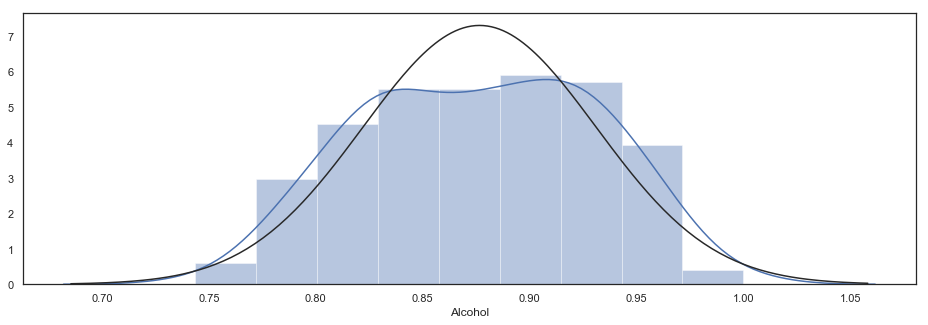

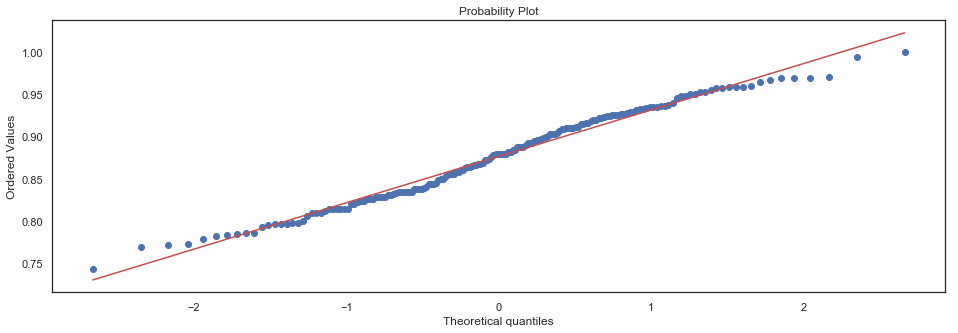

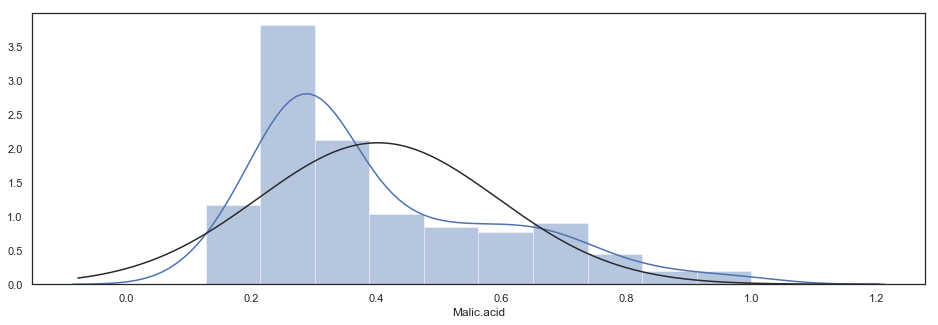

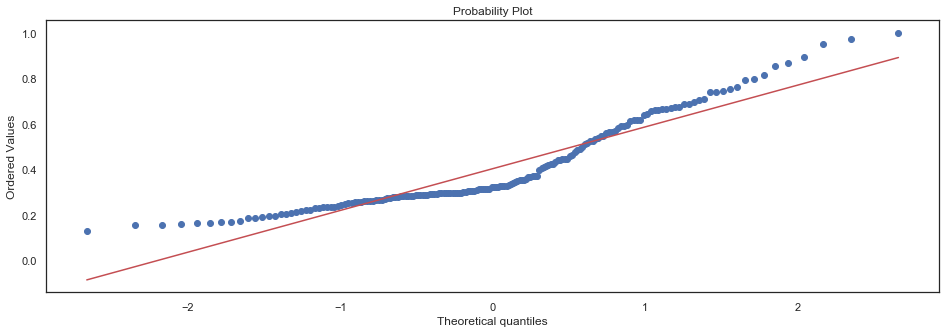

<Figure size 1152x360 with 0 Axes>

In [197]:
#Implementation of transform function
feature = ['Alcohol', 'Malic.acid']
df2 = m.transform(2, feature) #returned the transformed df (only specific columns transformed if specified)

In [198]:
#Transformed dataframe(only Alcohol and Malic acid is transformed)
df2.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,0.959541,0.294828,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0.890088,0.306897,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0.887390,0.406897,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0.968982,0.336207,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0.892785,0.446552,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### Outlier Detection & Treatment

In [210]:
class Outliers(Data):
    
    def __init__(self, Data):
        '''
        function to intialise the class object 
        '''
        self.data = Data.df
        self.pfeatures = Data.pfeatures

    
    def box_plot(self, variable):
        '''
        function to plot the box plot 
        outliers could be visualized using this
        Accepts variable name as an argument
        '''
        df = self.data.copy()
        sns.boxplot(data=df,x=df[variable])
    
    def iqr_method(self, variable):
        '''
        function identifies outliers based on IQR method
        Accepts variable name(as string) as an argument
        Returns two dataframes :
        - first df without outliers 
        - second df with outliers
        '''
        df = self.data.copy()
        q1 = df[variable].quantile(0.25)
        q3 = df[variable].quantile(0.75)
        iqr = q3-q1
        inner_fence = 1.5*iqr
        outer_fence = 3*iqr
    
        #inner fence lower and upper end
        inner_fence_le = q1-inner_fence
        inner_fence_ue = q3+inner_fence
        
        df_include = df.loc[(df[variable] >= inner_fence_le) & \
                            (df[variable] <= inner_fence_ue)] # meeting the acceptable range
        df_exclude = df.loc[(df[variable] < inner_fence_le) | \
                            (df[variable] > inner_fence_ue)] #not meeting acceptable range
        
        #outer fence lower and upper end
        outer_fence_le = q1-outer_fence
        outer_fence_ue = q3+outer_fence
        
        outliers_prob = []
        outliers_poss = []
        for index, x in enumerate(df[variable]):
            if x <= outer_fence_le or x >= outer_fence_ue:
                outliers_prob.append(index)
        for index, x in enumerate(df[variable]):
            if x <= inner_fence_le or x >= inner_fence_ue:
                outliers_poss.append(index)
        return df_include, df_exclude
         
    def z_score(self, variable_name):
        '''
        function identifies outliers based on Z-score method
        Accepts variable name(as string) as an argument
        Returns two dataframes :
        - first df without outliers 
        - second df with outliers
        '''
        df = self.data.copy()
        z = np.abs(stats.zscore(df[variable_name]))
        threshold = 3
        df_include = df[(z < threshold)]
        df_exclude = df[(z > threshold)]
        return df_include, df_exclude
    
    def mad_score(self, variable_name):
        '''
        function identifies outliers based on MAD(Median Absolute Deviation) method
        Accepts variable name(as string) as an argument
        Returns two dataframes :
        - first df without outliers 
        - second df with outliers
        '''
        df = self.data.copy()
        median = np.median(df[variable_name], axis = 0)
        mad = np.abs(stats.median_absolute_deviation(df[variable_name]))
        score = (df[variable_name] - median)/mad
        threshold = 3
        df_include = df[score < threshold]
        df_exclude = df[score > threshold]
        return df_include, df_exclude
    
    def imput_mean(self, df1, df2, variable_name):
        '''
        function imputes the outlier values with mean
        Accepts three argument:
        - first df without outliers 
        - second df with outliers
        - variable name(as string)
        Returns dataframe
        '''
        mean = int(df1[variable_name].mean())
        df2[variable_name] = mean
        df = pd.concat([df1, df2]) #concatenating both dfs to get the original shape
        return df
    
    def imput_median(self, df1, df2, variable_name):
        '''
        function imputes the outlier values with median
        Accepts three argument:
        - first df without outliers 
        - second df with outliers
        - variable name(as string)
        Returns dataframe
        '''
        median = int(df1[variable_name].median())
        df2[variable_name] = median
        df = pd.concat([df1, df2]) #concatenating both dfs to get the original shape
        return df
    
    def imput_mode(self, df1, df2, variable_name):
        '''
        function imputes the outlier values with mode
        Accepts three argument:
        - first df without outliers 
        - second df with outliers
        - variable name(as string)
        Returns dataframe
        '''
        mode = int(df1[variable_name].mode())
        df2[variable_name] = mode
        df = pd.concat([df1, df2]) #concatenating both dfs to get the original shape
        return df

    def capping(self, df1, df2, variable_name, low, high):
        '''
        function caps the outlier value
        Accepts three argument:
        - first df without outliers 
        - second df with outliers
        - variable name(as string)
        - low (lower bound value for capping if outlier value is below it)
        - high (upper bound value for capping if outlier value is above it)
        Returns dataframe
        '''
        #low = df1[variable_name].min()
        #high = df1[variable_name].max()
        df2.loc[df2[variable_name] <low, variable_name] = low
        df2.loc[df2[variable_name] >high, variable_name] = high
        df = pd.concat([df1, df2])
        return df
    

#### Creating class instance, Implementing methods
Below are the functions under outlier class
- box_plot('col_name')
- iqr_method('col_name')
- z_score('col_name')
- mad_score('col_name')
- imput_mean(df1(without outliers), df2(with outliers), 'col_name')
- imput_median(df1(without outliers), df2(with outliers), 'col_name')
- imput_mode(df1(without outliers), df2(with outliers), 'col_name')
- capping(df1(without outliers), df2(with outliers), 'col_name', low(lower cap value), high(upper cap value))

In [204]:
outlier = Outliers(r)

In [205]:
# IQR Method
df_without_outlier, df_with_outlier = outlier.iqr_method("Alcohol")
print(df_without_outlier.shape)
print(df_with_outlier.shape)

(178, 13)
(0, 13)


In [206]:
# Z-Score Method
df_without_outlier, df_with_outlier = outlier.z_score('Alcohol')
print(df_without_outlier.shape)
print(df_with_outlier.shape)

(178, 13)
(0, 13)


In [208]:
# Imputing with mean
df_mean = outlier.imput_mean(df_without_outlier, df_with_outlier, 'Alcohol')

In [209]:
df_mean.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [30]:
print(data['Alcohol'].skew())

-0.051482331077134784
